The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


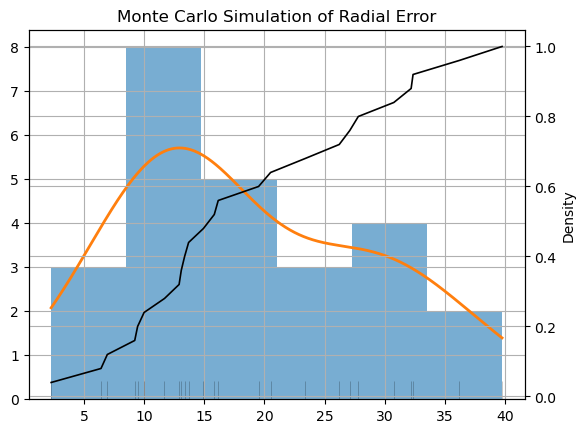

(None, None)

In [5]:
%load_ext autoreload
%autoreload 2

import sys, os
sys.path.append(os.path.abspath(os.path.join("..")))
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rayleigh
from radial_error.simulation import simulate_radial_error
from radial_error.plots import plt_title_x_y, auto_hist

N_SAMPLES = 25
MU_X = 0
MU_Y = 0
SIGMA_X = 10
SIGMA_Y = 20
RADIAL_CUTOFF = 50

r = simulate_radial_error(n_samples=N_SAMPLES, seed=0, mu_x=MU_X, sigma_x = SIGMA_X, mu_y = MU_Y, sigma_y = SIGMA_Y)

_, bins = auto_hist(r,rug=True, density=False)

if SIGMA_X == 0 and SIGMA_Y == 0:
    x = np.linspace(0, np.max(r), len(bins))
    plt.plot(x, rayleigh.pdf(x, scale=1), linestyle='--', label='Rayleigh PDF')

plt_title_x_y("Monte Carlo Simulation of Radial Error", "r", "Density")
plt.grid(True), plt.show()


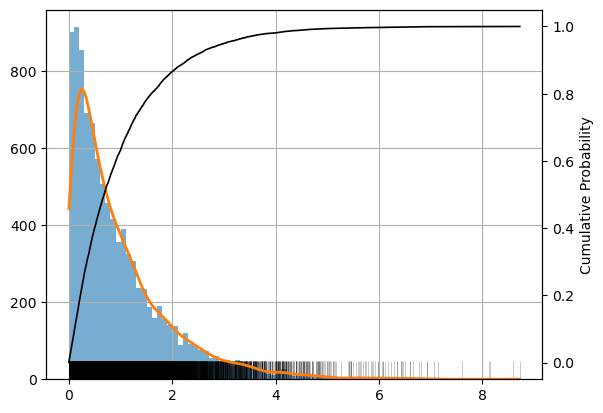

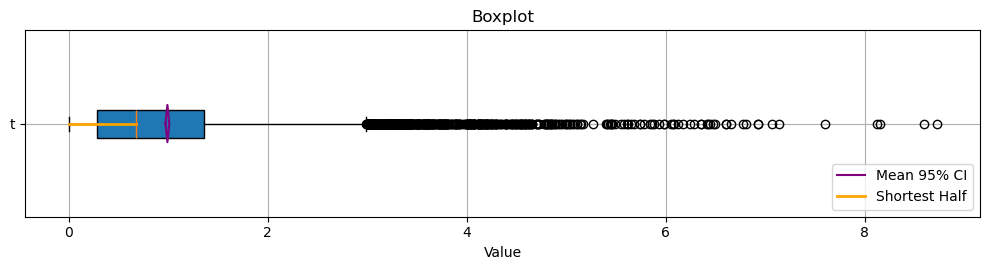

--- Analysis of t ---
Median: 0.680
Skewness: 1.983 (highly right skewed)
Kurtosis: 5.600 (heavy-tailed)
Kurtosis Conclusion: Not Gaussian. Consider Laplace or t-distribution.
0.00013992898121743602
0.9928375083784198


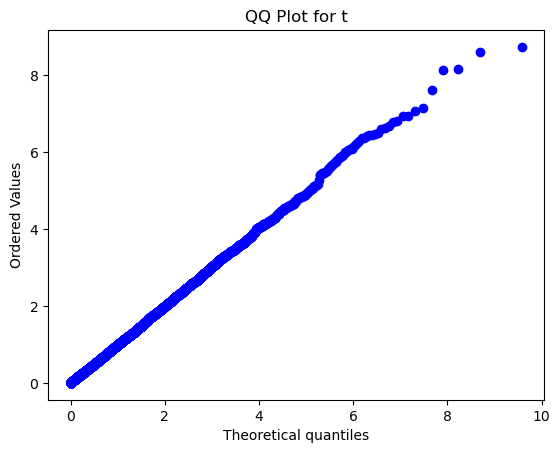

In [ ]:
from radial_error.plots import Boxplot, Fitplot
from radial_error.stats import safe_fit, analyze_distribution, bootstrap_summary_stats, predict_intervals, test_normality
from scipy.stats import probplot

rng = np.random.default_rng(0)
t = rng.exponential(1, 100)
_, bins = auto_hist(t,rug=True, density=False)
Boxplot(t,labels='t')
analyze_distribution(t, name="t")
probplot(t, dist="expon", sparams=(0, 1),  plot=plt)
plt.title("QQ Plot for t")


#test_normality(t, alpha=0.05, plot=True, verbose=True, name="t")




loc, scale = safe_fit(t, distribution='exponential')
print(loc)
print(scale)


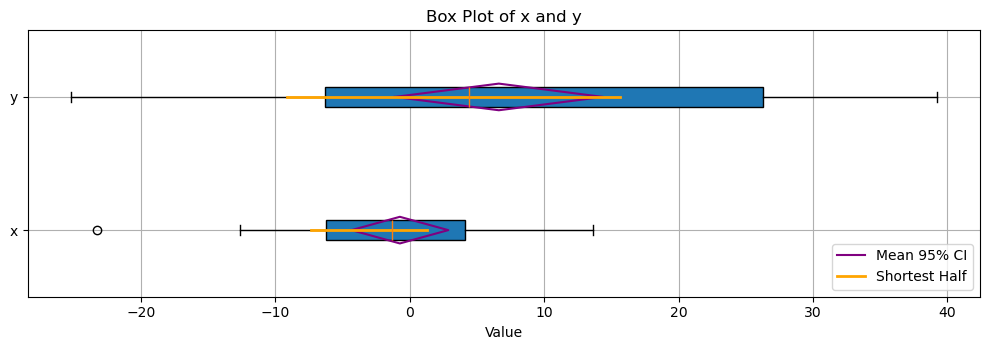

⚠️ Mean may be unreliable — recommended n > 30
⚠️ Sigma may be unreliable — recommended n > 50
⚠️ Mean may be unreliable — recommended n > 30
⚠️ Sigma may be unreliable — recommended n > 50


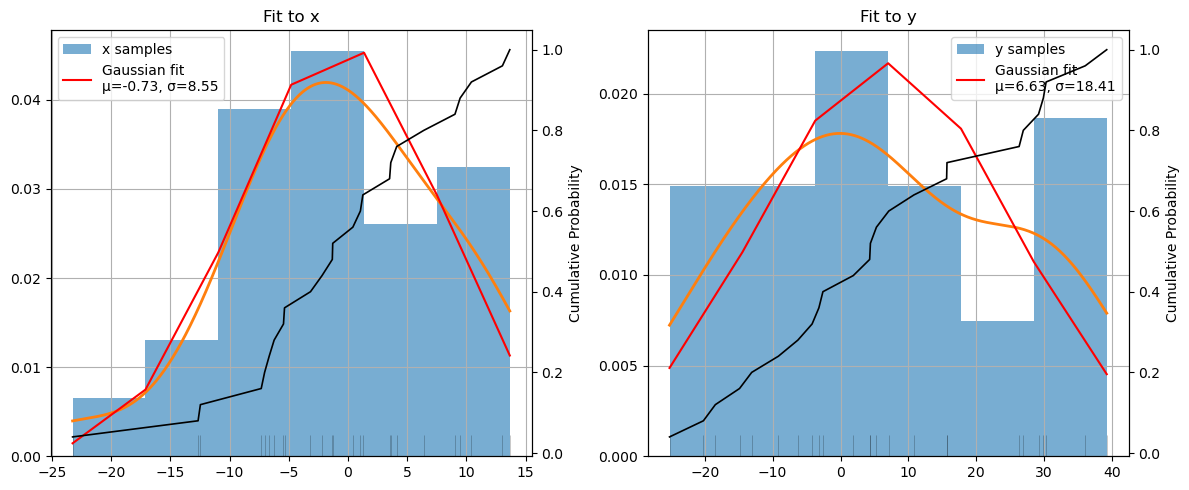

⚠️ Skewness may be unreliable — recommended n > 200
⚠️ Kurtosis may be unreliable — recommended n > 500
--- Analysis of x ---
Median: -1.285
Skewness: -0.423 (approximately symmetric)
Kurtosis: 0.149 (normal-tailed)
Conclusion: Gaussian-like. Gaussian fit likely appropriate.
95% Confidence Interval for μ (x): [-4.337, 2.868]
95% Confidence Interval for σ (x): [6.815, 12.142]
95% Prediction Interval for new x: [-19.104, 17.636]
Approximate 99% Tolerance Interval: [-23.216, 21.747]
⚠️ Skewness may be unreliable — recommended n > 200
⚠️ Kurtosis may be unreliable — recommended n > 500
--- Analysis of y ---
Median: 4.404
Skewness: 0.141 (approximately symmetric)
Kurtosis: -1.087 (very light-tailed)
Conclusion: Some deviation from Gaussian. Consider testing Laplace or logistic.
95% Confidence Interval for μ (x): [-1.126, 14.383]
95% Confidence Interval for σ (x): [14.669, 26.136]
95% Prediction Interval for new x: [-32.914, 46.171]
Approximate 99% Tolerance Interval: [-41.763, 55.021]
--- S

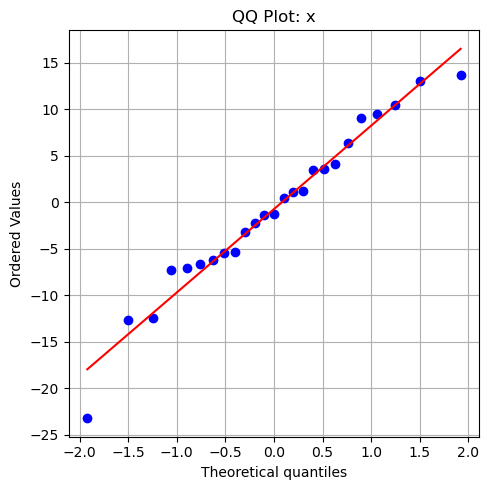

--- Shapiro–Wilk Normality Test on 'y' ---
W statistic: 0.9580
p-value:     0.3767
✅ Fail to reject H₀ — data looks normal (α = 0.05)


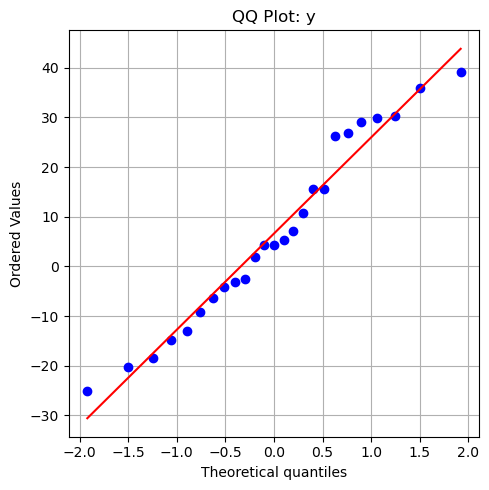

Prediction (1 value): [-18.733, 17.265] (width = 35.998)
Prediction (10 values, Bonferroni): [-27.686, 26.218] (width = 53.904)
Tolerance Interval (95%, approx): [-17.495, 16.026] (width = 33.521)
Prediction (1 value): [-32.115, 45.372] (width = 77.487)
Prediction (10 values, Bonferroni): [-51.386, 64.643] (width = 116.030)
Tolerance Interval (95%, approx): [-29.449, 42.706] (width = 72.156)
x
ℹ️ Note: Skew/kurtosis estimates are likely unstable below n=30.
Mean: -0.734 [-4.060, 2.505]
Median: -1.285 [-5.443, 3.616]
Variance: 73.128 [35.695, 118.546]
Skewness: -0.398 [-1.060, 0.629]
Kurtosis: 0.149 [-1.276, 1.572]
y
ℹ️ Note: Skew/kurtosis estimates are likely unstable below n=30.
Mean: 6.629 [-0.170, 13.932]
Median: 4.404 [-4.184, 15.680]
Variance: 338.832 [193.223, 459.736]
Skewness: 0.133 [-0.422, 0.720]
Kurtosis: -1.087 [-1.513, -0.166]


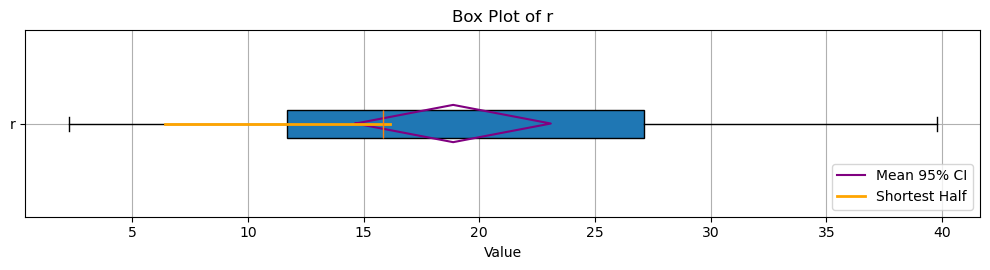

⚠️ Mean may be unreliable — recommended n > 30
⚠️ Sigma may be unreliable — recommended n > 50
⚠️ Mean may be unreliable — recommended n > 30
⚠️ Sigma may be unreliable — recommended n > 50


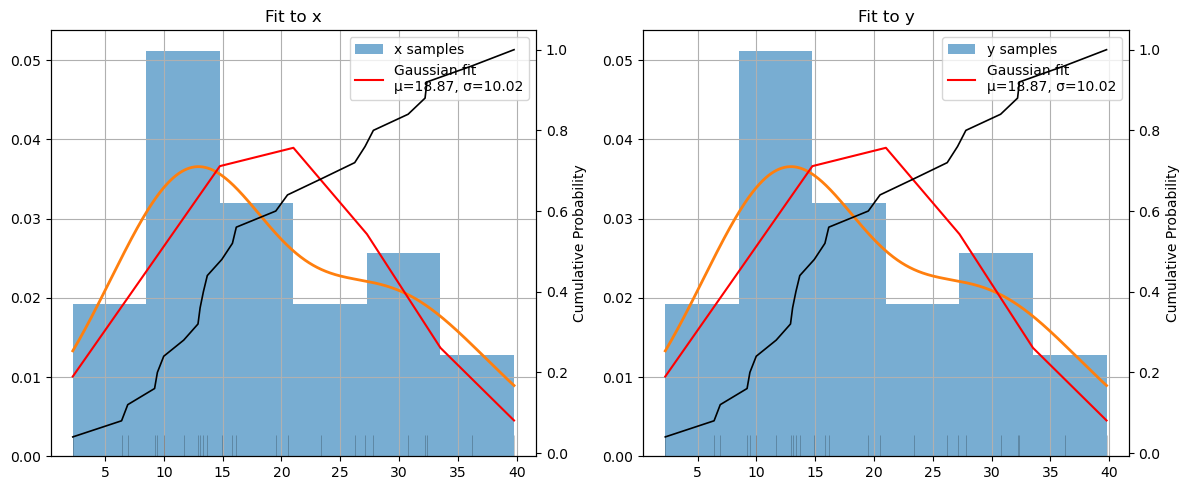

⚠️ Skewness may be unreliable — recommended n > 200
⚠️ Kurtosis may be unreliable — recommended n > 500
--- Analysis of r ---
Median: 15.831
Skewness: 0.456 (approximately symmetric)
Kurtosis: -0.892 (normal-tailed)
Conclusion: Gaussian-like. Gaussian fit likely appropriate.
95% Confidence Interval for μ (x): [14.652, 23.091]
95% Confidence Interval for σ (x): [7.982, 14.221]
95% Prediction Interval for new x: [-2.645, 40.387]
Approximate 99% Tolerance Interval: [-7.460, 45.202]
r
ℹ️ Note: Skew/kurtosis estimates are likely unstable below n=30.
Mean: 6.629 [-0.822, 13.561]
Median: 4.404 [-3.185, 15.680]
Variance: 338.832 [197.536, 465.454]
Skewness: 0.133 [-0.395, 0.717]
Kurtosis: -1.087 [-1.487, -0.112]
--- Shapiro–Wilk Normality Test on 'r' ---
W statistic: 0.9499
p-value:     0.2491
✅ Fail to reject H₀ — data looks normal (α = 0.05)


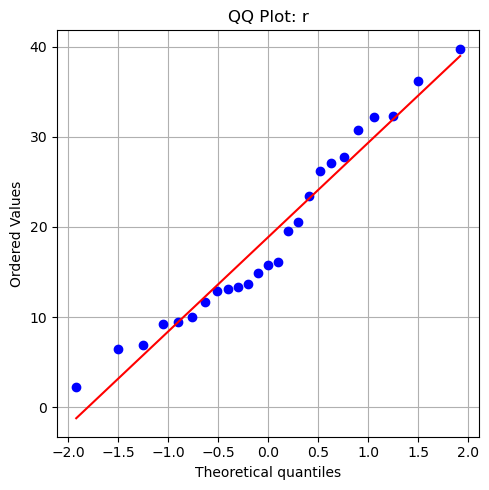

Prediction (1 value): [-2.210, 39.952] (width = 42.162)
Prediction (10 values, Bonferroni): [-12.696, 50.438] (width = 63.134)
Tolerance Interval (95%, approx): [-0.759, 38.502] (width = 39.261)


In [8]:
from radial_error.simulation import sample_xy, compute_radial_error
from radial_error.stats import analyze_distribution, bootstrap_summary_stats, predict_intervals, test_normality
from radial_error.plots import Boxplot, Fitplot

#N_SAMPLES = 30
N_FUTURE_SAMPLES = 10



x, y = sample_xy(n_samples=N_SAMPLES, seed=0,sigma_x = SIGMA_X, sigma_y = SIGMA_Y)
r = compute_radial_error(x, y)

#QQplot(x, MU_X, SIGMA_X, y, MU_Y, SIGMA_Y)
Boxplot(x,y, labels=['x','y'], title="Box Plot of x and y")
mu_x, sigma_x, mu_y, sigma_y = Fitplot(x, y)

analyze_distribution(x, name="x")
analyze_distribution(y, name="y")

test_normality(x, alpha=0.05, plot=True, verbose=True, name="x")
test_normality(y, alpha=0.05, plot=True, verbose=True, name="y")


intervals_x = predict_intervals(mu_x, sigma_x, n_sample=N_SAMPLES, n_future=N_FUTURE_SAMPLES, alpha=0.05, coverage=0.95)
intervals_y = predict_intervals(mu_y, sigma_y, n_sample=N_SAMPLES, n_future=N_FUTURE_SAMPLES, alpha=0.05, coverage=0.95)


for name, (lo, hi) in intervals_x.items():
    print(f"{name}: [{lo:.3f}, {hi:.3f}] (width = {hi - lo:.3f})")
for name, (lo, hi) in intervals_y.items():
    print(f"{name}: [{lo:.3f}, {hi:.3f}] (width = {hi - lo:.3f})")

print('x')
results = bootstrap_summary_stats(x)
for stat, vals in results.items():
    print(f"{stat.title()}: {vals['value']:.3f} "
          f"[{vals['ci_lower']:.3f}, {vals['ci_upper']:.3f}]")

print('y')
results = bootstrap_summary_stats(y)
for stat, vals in results.items():
    print(f"{stat.title()}: {vals['value']:.3f} "
          f"[{vals['ci_lower']:.3f}, {vals['ci_upper']:.3f}]")


#QQplot(x, MU_X, SIGMA_X, y, MU_Y, SIGMA_Y)
Boxplot(r, labels='r', title="Box Plot of r")
mu_x, sigma_x, mu_y, sigma_y = Fitplot(r, r)

analyze_distribution(r, name="r")
print('r')
results = bootstrap_summary_stats(y)
for stat, vals in results.items():
    print(f"{stat.title()}: {vals['value']:.3f} "
          f"[{vals['ci_lower']:.3f}, {vals['ci_upper']:.3f}]")

test_normality(r, alpha=0.05, plot=True, verbose=True, name="r")


intervals_r = predict_intervals(mu_x, sigma_x, n_sample=N_SAMPLES, n_future=N_FUTURE_SAMPLES, alpha=0.05, coverage=0.95)


for name, (lo, hi) in intervals_r.items():
    print(f"{name}: [{lo:.3f}, {hi:.3f}] (width = {hi - lo:.3f})")






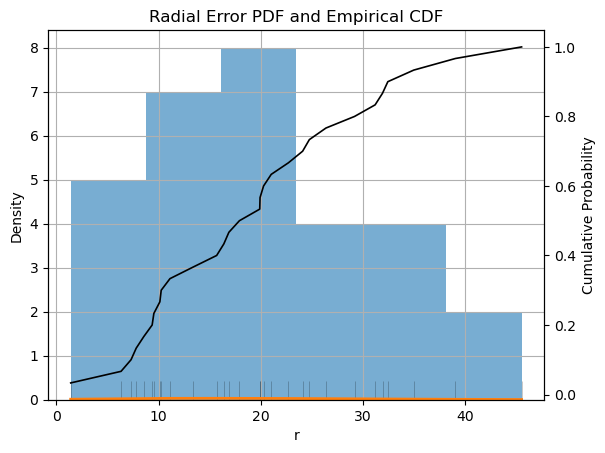

In [22]:
# Histogram
fig, ax1 = plt.subplots()

auto_hist(r, label="PDF (Histogram)", density=False, ax=ax1, rug=True)

ax1.set_xlabel("r")
ax1.set_ylabel("Density")
ax1.grid(True)


# Legends and title
plt.title("Radial Error PDF and Empirical CDF")
plt.show()


In [3]:
fraction_exceeding_50 = np.mean(r > 50)
print(f"Fraction of samples with r > 50: {fraction_exceeding_50:.5f}")


Fraction of samples with r > 50: 0.00000


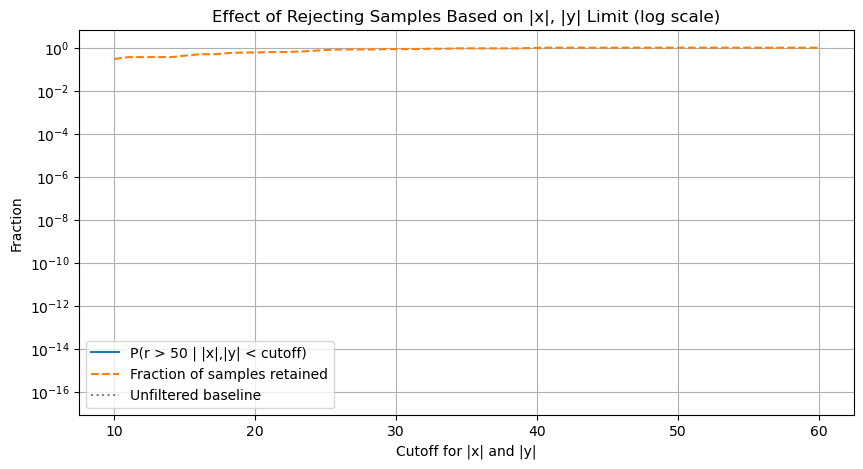

In [4]:
cutoffs = np.linspace(10, RADIAL_CUTOFF+int(0.2*RADIAL_CUTOFF), RADIAL_CUTOFF)
fractions_above_cutoff = []
fractions_retained = []

for c in cutoffs:
    mask = (np.abs(x) <= c) & (np.abs(y) <= c)
    r_filtered = r[mask]
    
    if len(r_filtered) == 0:
        fractions_above_cutoff.append(np.nan)
        fractions_retained.append(0)
    else:
        frac_high_r = np.mean(r_filtered > RADIAL_CUTOFF)
        fractions_above_cutoff.append(frac_high_r)
        fractions_retained.append(len(r_filtered) / len(r))

# Plot: Fraction of retained samples with r > 50 vs cutoff
plt.figure(figsize=(10, 5))
plt.plot(cutoffs, fractions_above_cutoff, label="P(r > "+str(RADIAL_CUTOFF)+" | |x|,|y| < cutoff)")
plt.plot(cutoffs, fractions_retained, label="Fraction of samples retained", linestyle="--")
plt.axhline(np.mean(r > RADIAL_CUTOFF), color='gray', linestyle=':', label="Unfiltered baseline")
plt.xlabel("Cutoff for |x| and |y|")
plt.ylabel("Fraction")
plt.yscale("log")  # <-- Log scale here
plt.title("Effect of Rejecting Samples Based on |x|, |y| Limit (log scale)")
plt.legend()
plt.grid(True)
plt.show()

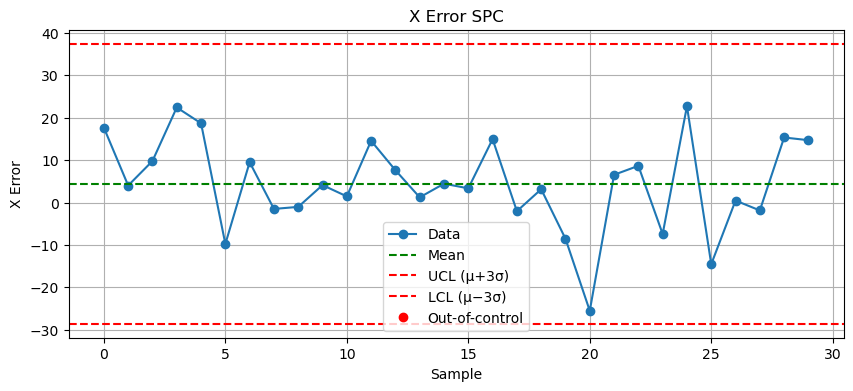

In [68]:
from radial_error.plots import plot_spc

plot_spc(x, title="X Error SPC", ylabel="X Error")
plt.show()


In [5]:
from radial_error.simulation import sample_xy
from radial_error.stats import analyze_distribution

x, y = sample_xy(n_samples=100000, seed=0)

analyze_distribution(x, name="x")
analyze_distribution(y, name="y")

--- Analysis of x ---
Median: 0.002
Skewness: -0.008 (approximately symmetric)
Kurtosis: 0.031 (normal-tailed)
Conclusion: Gaussian-like. Gaussian fit likely appropriate.
95% Confidence Interval for μ (x): [-0.005, 0.008]
95% Confidence Interval for σ (x): [0.993, 1.002]
95% Prediction Interval for new x: [-1.953, 1.956]
Approximate 99% Tolerance Interval: [-2.567, 2.571]
--- Analysis of y ---
Median: 0.006
Skewness: 0.006 (approximately symmetric)
Kurtosis: 0.000 (normal-tailed)
Conclusion: Gaussian-like. Gaussian fit likely appropriate.
95% Confidence Interval for μ (x): [-0.001, 0.011]
95% Confidence Interval for σ (x): [0.994, 1.003]
95% Prediction Interval for new x: [-1.952, 1.963]
Approximate 99% Tolerance Interval: [-2.567, 2.578]
